In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown "https://drive.google.com/uc?id=178f_VkNxccNidap-5-uffXUW475pAuPy&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=178f_VkNxccNidap-5-uffXUW475pAuPy&confirm=t
To: /content/fake-news.zip
100% 48.7M/48.7M [00:01<00:00, 33.3MB/s]


In [ ]:
!unzip fake-news.zip

Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 8.3 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
     |████████████████████████████████| 120 kB 48.7 MB/s 


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import re
from transformers import AutoModel , BertTokenizerFast,BertForSequenceClassification,TrainingArguments,Trainer
from sklearn.model_selection import train_test_split
import torch
import gc
nltk.download('omw-1.4')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Reading the dataset
news= pd.read_csv('train.csv')
news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
#Printing shape of news
print(f"The shape of the dataset :{news.shape}")

#Printing colums
print(f"The columns of the dataset: {news.columns}")

The shape of the dataset :(20800, 5)
The columns of the dataset: Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


1 : Fake
0 : Real
0    10361
1     8482
Name: label, dtype: int64


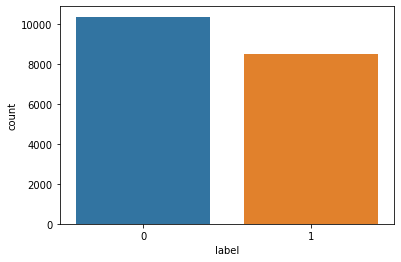

In [ ]:
#Printing the plot Fake/Real
sns.countplot(x = 'label' , data = news)
print('1 : Fake')
print('0 : Real')
print(news.label.value_counts())

In [ ]:
#Clean text
stop_words = stopwords.words('english')
words_dict = Counter(stop_words)
def clean_text(text):
  text = str(text).replace(r'http[\w/:/\.]+',' ') # url
  text = str(text).replace(r'[^\.\w\s]',' ') #only chars
  text = str(text).replace('[^a-zA-Z]' , ' ')
  text = str(text).replace(r'\s\s+', ' ')
  text = text.lower().strip()
  return text
#nltk preprocessing
def prepro(text):
  text = clean_text(text)
  words = re.sub(r'[^\w\s]' , '' , text).split()
  lemma = nltk.stem.WordNetLemmatizer()
  text = ' '.join([lemma.lemmatize(word) for word in words if word not in words_dict])
  return text



In [ ]:
#Cleaning the dataset
text = ['title','text']
#remove id,author columns
def remove_c(df):
    df = df.drop(['id','author'] , axis =1 )
    return df
#Change null to None
def remove_null(df):
    for col in text:
        df.loc[df[col].isnull(),col] = 'None'
    return df

def clean_dataset(df):
  df = remove_null(df)
  df = remove_c(df)
  return df
clean_dataset(news)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
#cleaning and prepro
df = clean_dataset(news)
df['text'] = df.text.apply(prepro)
df['title'] = df.title.apply(prepro)

df.head()



,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1


In [ ]:
#bigram and trigrams
real_n  = ''.join(df[df['label'] == 0]['text'])
fake_n  = ''.join(df[df['label'] == 1]['text'])
def n_grams(corpus,title,ylabel,xlabel = 'Number of Occurences' , n = 2):
    bigram = (pd.Series(nltk.ngrams(corpus.split(),n)).value_counts())[:10]
    bigram.sort_values().plot.barh(color = 'red' ,width = .8, figsize = (10,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show

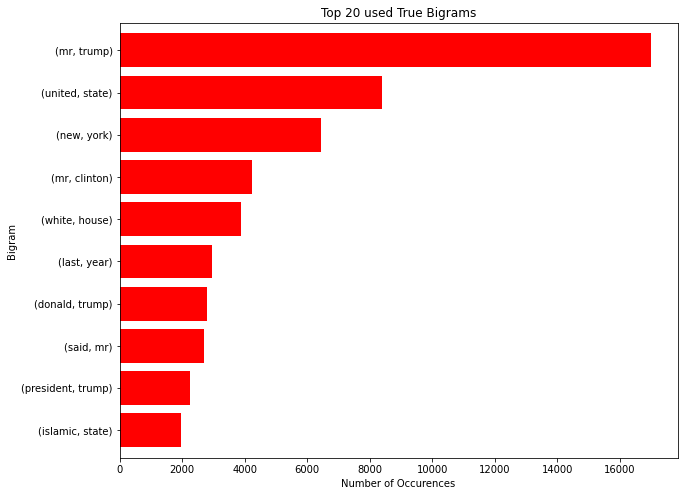

In [ ]:
#2_gram for Real News
n_grams(real_n, 'Top 20 used True Bigrams' , 'Bigram' , n = 2)

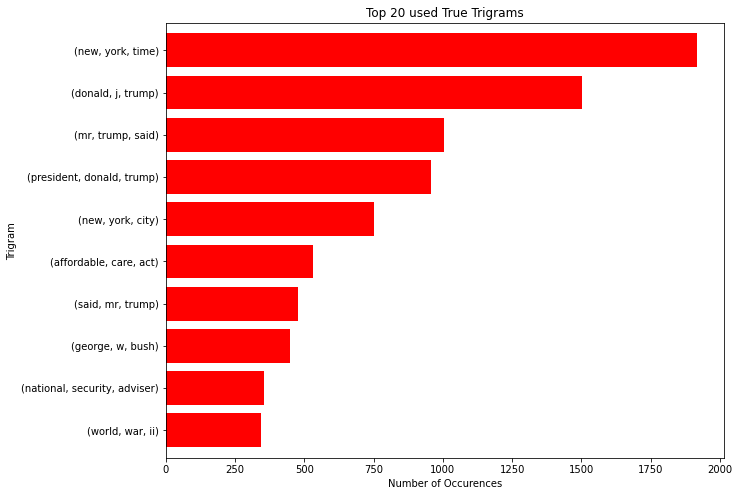

In [ ]:
#3_gram for Real News
n_grams(real_n, 'Top 20 used True Trigrams' , 'Trigram' , n = 3)

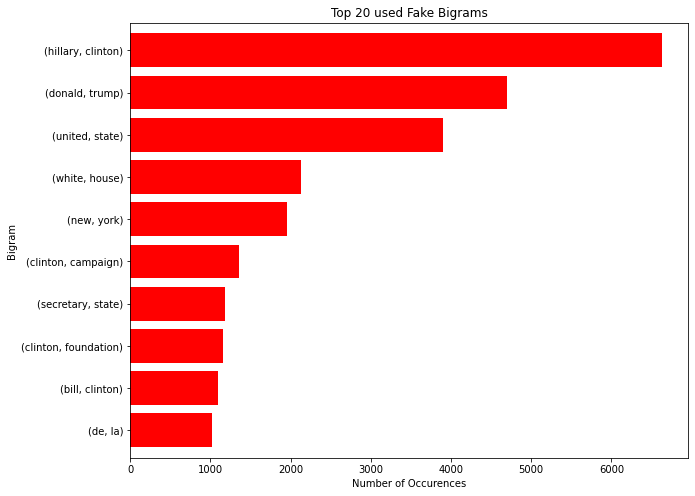

In [ ]:
#2_gram for fake News
n_grams(fake_n, 'Top 20 used Fake Bigrams' , 'Bigram' , n = 2)

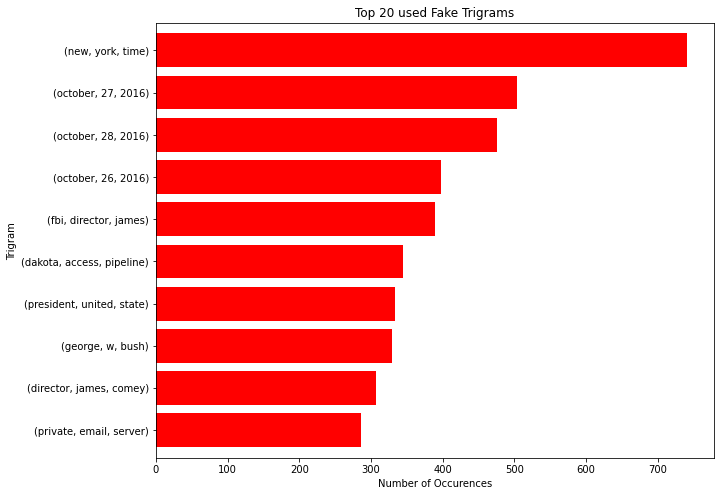

In [ ]:
#3_gram for Fake News
n_grams(fake_n, 'Top 20 used Fake Trigrams' , 'Trigram' , n = 3)

In [ ]:
#We use the bert tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased',do_lower_case = True)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#dealing with NaN values
news = news[news['text'].notna()]
news = news[news['author'].notna()]
news = news[news['title'].notna()]

In [ ]:
#function to convert dataframe to lists
#separating the train dataset to train and validation lists
def data_prep(df , test_size = 0.1):
    texts= []
    labels = []
    for i in range(len(df)):
      text = df['text'].iloc[i]
      label = df['label'].iloc[i]
      if text and label in [0,1]:
          texts.append(text)
          labels.append(label)

    return train_test_split(texts , labels ,test_size=test_size)

train_text , valid_text ,train_labels,valid_labels = data_prep(news)

In [ ]:
print(len(train_text) , len(train_labels))
print(len(valid_text) , len(valid_labels))

16958 16958
1885 1885


In [ ]:
#Tokenize the dataset
train_tokens = tokenizer(train_text , truncation = True , padding = True , max_length = 512)
valid_tokens = tokenizer(valid_text , truncation = True , padding = True , max_length = 512)

In [ ]:
#Train and Validation datasets
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_ds = NewsDataset(train_tokens , train_labels)
valid_ds = NewsDataset(valid_tokens , valid_labels)

In [ ]:

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels = 2)


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }


In [ ]:
#params for the model

train_params = TrainingArguments(
    output_dir = './model',
    num_train_epochs = 1,
    per_device_train_batch_size = 10,
    per_device_eval_batch_size = 20,
    warmup_steps = 50,
    load_best_model_at_end = True,
    logging_steps = 200,
    save_steps = 200,
    evaluation_strategy = "steps"
)

In [ ]:
trainmodel = Trainer(
    model = model,
    args = train_params,
    train_dataset = train_ds,
    eval_dataset = valid_ds,
    compute_metrics=compute_metrics)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainmodel.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 16958
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1696


Step,Training Loss,Validation Loss,Accuracy
200,0.287900,0.131476,0.967109
400,0.115200,0.106290,0.975066
600,0.068700,0.095960,0.981963
800,0.078100,0.043712,0.989920
1000,0.027700,0.017477,0.995756
1200,0.031500,0.012122,0.996286
1400,0.026400,0.017604,0.995756
1600,0.016200,0.013568,0.996286


***** Running Evaluation *****
  Num examples = 1885
  Batch size = 20
Saving model checkpoint to ./model/checkpoint-200
Configuration saved in ./model/checkpoint-200/config.json
Model weights saved in ./model/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1885
  Batch size = 20
Saving model checkpoint to ./model/checkpoint-400
Configuration saved in ./model/checkpoint-400/config.json
Model weights saved in ./model/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1885
  Batch size = 20
Saving model checkpoint to ./model/checkpoint-600
Configuration saved in ./model/checkpoint-600/config.json
Model weights saved in ./model/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1885
  Batch size = 20
Saving model checkpoint to ./model/checkpoint-800
Configuration saved in ./model/checkpoint-800/config.json
Model weights saved in ./model/checkpoint-800/pytorch_model.bin
***** Running Evaluation ***

TrainOutput(global_step=1696, training_loss=0.07795518749165085, metrics={'train_runtime': 2204.0497, 'train_samples_per_second': 7.694, 'train_steps_per_second': 0.769, 'total_flos': 4461837276794880.0, 'train_loss': 0.07795518749165085, 'epoch': 1.0})

In [ ]:
trainmodel.evaluate()

***** Running Evaluation *****
  Num examples = 1885
  Batch size = 20


{'eval_loss': 0.012121843174099922,
 'eval_accuracy': 0.9962864721485412,
 'eval_runtime': 63.8219,
 'eval_samples_per_second': 29.535,
 'eval_steps_per_second': 1.489,
 'epoch': 1.0}

In [ ]:
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [ ]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to('cpu')
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [ ]:
real_n = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

fake_n = """1."Pizzagate" was a fake news story which connected a pizzeria with a child pornography ring allegedly run by Hillary Clinton and John Podesta. On Sunday, December 3, 2016, an armed shooter entered the pizzeria and fired a shot before being accosted by the police.

"""

In [ ]:
model = BertForSequenceClassification.from_pretrained('fake-news-bert-base-uncased/', num_labels=2)

In [ ]:
get_prediction(real_n, convert_to_label=True)

'reliable'

In [ ]:
get_prediction(fake_n, convert_to_label=True)

'fake'